In [87]:
# Importing Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,StandardScaler

### Load Data: Use Pandas to load the provided Excel file into a DataFrame.

In [88]:
df = pd.read_csv("D:\healthcare.csv")
df.head()

,User_ID,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,1,Bobby JacksOn,30,Male,B-,Cancer,31-01-2024,Matthew Smith,Sons and Miller,Blue Cross,18856.28131,328,Urgent,02-02-2024,Paracetamol,Normal
1,2,LesLie TErRy,62,Male,A+,Obesity,20-08-2019,Samantha Davies,Kim Inc,Medicare,33643.32729,265,Emergency,26-08-2019,Ibuprofen,Inconclusive
2,3,DaNnY sMitH,76,Female,A-,Obesity,22-09-2022,Tiffany Mitchell,Cook PLC,Aetna,27955.09608,205,Emergency,07-10-2022,Aspirin,Normal
3,4,andrEw waTtS,28,Female,O+,Diabetes,18-11-2020,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78241,450,Elective,18-12-2020,Ibuprofen,Abnormal
4,5,adrIENNE bEll,43,Female,AB+,Cancer,19-09-2022,Kathleen Hanna,White-White,Aetna,14238.31781,458,Urgent,09-10-2022,Penicillin,Abnormal


### Data Understanding & Cleaning: Understanding the data by shape, columns, info & Clean the data by handling missing values, removing duplicates, correcting data types.


In [89]:
df.shape

(5000, 16)

In [90]:
df.columns

Index(['User_ID', 'Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   User_ID             5000 non-null   int64  
 1   Name                5000 non-null   object 
 2   Age                 5000 non-null   int64  
 3   Gender              5000 non-null   object 
 4   Blood Type          5000 non-null   object 
 5   Medical Condition   5000 non-null   object 
 6   Date of Admission   5000 non-null   object 
 7   Doctor              5000 non-null   object 
 8   Hospital            5000 non-null   object 
 9   Insurance Provider  5000 non-null   object 
 10  Billing Amount      5000 non-null   float64
 11  Room Number         5000 non-null   int64  
 12  Admission Type      5000 non-null   object 
 13  Discharge Date      5000 non-null   object 
 14  Medication          5000 non-null   object 
 15  Test Results        5000 non-null   object 
dtypes: flo

In [92]:
df.head()

,User_ID,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,1,Bobby JacksOn,30,Male,B-,Cancer,31-01-2024,Matthew Smith,Sons and Miller,Blue Cross,18856.28131,328,Urgent,02-02-2024,Paracetamol,Normal
1,2,LesLie TErRy,62,Male,A+,Obesity,20-08-2019,Samantha Davies,Kim Inc,Medicare,33643.32729,265,Emergency,26-08-2019,Ibuprofen,Inconclusive
2,3,DaNnY sMitH,76,Female,A-,Obesity,22-09-2022,Tiffany Mitchell,Cook PLC,Aetna,27955.09608,205,Emergency,07-10-2022,Aspirin,Normal
3,4,andrEw waTtS,28,Female,O+,Diabetes,18-11-2020,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78241,450,Elective,18-12-2020,Ibuprofen,Abnormal
4,5,adrIENNE bEll,43,Female,AB+,Cancer,19-09-2022,Kathleen Hanna,White-White,Aetna,14238.31781,458,Urgent,09-10-2022,Penicillin,Abnormal


User_ID               0
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


<Axes: >

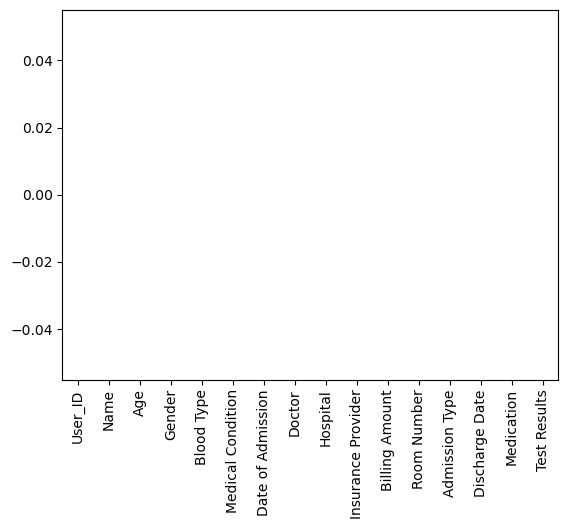

In [93]:
# Check for missing values
print(df.isnull().sum())

# Visualize missing data
df.isna().sum().plot(kind='bar')

In [94]:
# Check duplicates

df.duplicated().sum()

0

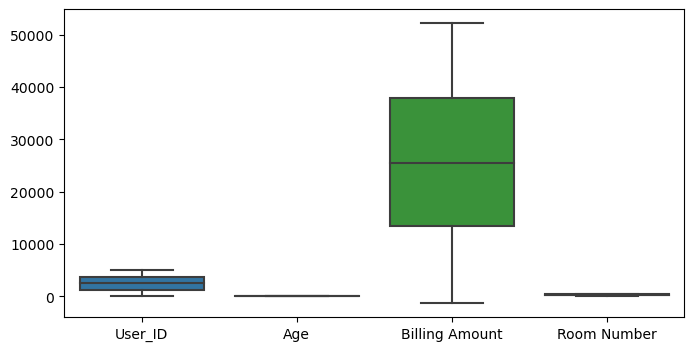

In [95]:
# Check in outlier data set

plt.figure(figsize=(8,4))

sns.boxplot(df)

plt.show()

In [96]:
# Extract only numberic data types & Check skewness in data set

x = df.select_dtypes(include = ['number'])
x.skew()

User_ID           0.000000
Age              -0.000665
Billing Amount   -0.004724
Room Number      -0.001286
dtype: float64

In [97]:
#Calculate Summary Statistics

df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,5000.0,2500.500000,1443.520003,1.000000,1250.75000,2500.500000,3750.250000,5000.00000
Age,5000.0,51.870800,19.726458,18.000000,35.00000,52.000000,69.000000,85.00000
Billing Amount,5000.0,25632.665128,14197.716083,-1310.272895,13425.31416,25584.343045,37848.887522,52181.83779
Room Number,5000.0,299.183600,116.132514,101.000000,200.00000,300.000000,397.000000,500.00000


In [98]:
# Extract only Object data types & check object description

y = df.select_dtypes(include = ['object'])
y.describe().T

,count,unique,top,freq
Name,5000,5000,Bobby JacksOn,1
Gender,5000,2,Male,2522
Blood Type,5000,8,A+,645
Medical Condition,5000,6,Cancer,862
Date of Admission,5000,1714,03-06-2020,9
Doctor,5000,4836,Michael Johnson,4
Hospital,5000,4719,Johnson PLC,8
Insurance Provider,5000,5,Cigna,1022
Admission Type,5000,3,Elective,1686
Discharge Date,5000,1724,27-01-2021,11


### Data preprocessing

#### Handle Categorical Data

In [99]:
# Define categorical columns & Use OneHotEncoder & LabelEncoder

ohe_columns = ['Gender', 'Blood Type', 'Medical Condition','Admission Type', 'Medication', 'Test Results']
le_columns = ['Doctor', 'Hospital', 'Insurance Provider']

# Initialize StandardScaler
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
le = LabelEncoder()

# Apply one-hot encoding & label encoding to categorical columns
df_ohe_columns = ohe.fit_transform(df[ohe_columns])
df[le_columns] = df[le_columns].apply(le.fit_transform)

# Create a dataframe with one-hot encoded columns
df_ohe_columns = pd.DataFrame(df_ohe_columns, columns = ohe.get_feature_names_out(ohe_columns))

#### Handle Numerical Data

In [100]:
# Define numeric columns & Use StandardScaler to normalize numerical data.

ss_columns = ['Age', 'Billing Amount', 'Room Number']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling to numerical columns
df[ss_columns] = scaler.fit_transform(df[ss_columns])

In [101]:
df[ss_columns]

,Age,Billing Amount,Room Number
0,-1.108815,-0.477335,0.248159
1,0.513534,0.564278,-0.294379
2,1.223312,0.163594,-0.811082
3,-1.210212,0.864811,1.298788
4,-0.449735,-0.802628,1.367681
...,...,...,...
4995,-0.551132,-1.046990,-1.052210
4996,1.274010,-1.418143,1.643256
4997,1.679598,-1.442540,1.720762
4998,-1.210212,-1.435030,-1.586137


### Feature Matrix Creation

In [102]:
# Combine the one-hot encoded,label encoded and scaled numerical data into a single dataframe for the content-based recommendation.

features = pd.concat([df_ohe_columns, df[le_columns], df[ss_columns]], axis=1)

In [103]:
features

,Gender_Female,Gender_Male,Blood Type_A+,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,Blood Type_O-,...,Medication_Penicillin,Test Results_Abnormal,Test Results_Inconclusive,Test Results_Normal,Doctor,Hospital,Insurance Provider,Age,Billing Amount,Room Number
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,3200,3631,1,-1.108815,-0.477335,0.248159
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,4044,1910,3,0.513534,0.564278,-0.294379
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,4510,616,0,1.223312,0.163594,-0.811082
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,2733,1424,3,-1.210212,0.864811,1.298788
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,2589,4047,0,-0.449735,-0.802628,1.367681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,3261,4512,0,-0.551132,-1.046990,-1.052210
4996,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,3515,3256,4,1.274010,-1.418143,1.643256
4997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,792,432,4,1.679598,-1.442540,1.720762
4998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,2598,2009,4,-1.210212,-1.435030,-1.586137


### Model Building by using Cosine Similarity

In [104]:
# Compute the cosine similarity matrix

similarity_matrix = cosine_similarity(features)
similarity_matrix

array([[1.        , 0.91824781, 0.75662241, ..., 0.93967752, 0.98197109,
        0.99806213],
       [0.91824781, 1.        , 0.95369582, ..., 0.99829708, 0.97654873,
        0.94110849],
       [0.75662241, 0.95369582, 1.        , ..., 0.93460512, 0.8665761 ,
        0.7958398 ],
       ...,
       [0.93967752, 0.99829708, 0.93460512, ..., 1.        , 0.98738892,
        0.95913655],
       [0.98197109, 0.97654873, 0.8665761 , ..., 0.98738892, 1.        ,
        0.99183001],
       [0.99806213, 0.94110849, 0.7958398 , ..., 0.95913655, 0.99183001,
        1.        ]])

In [105]:
# Make Recommendations to get top 3 health tips (medication) based on similar users

def get_medication_tips(user_id, similarity_matrix, df, n_recommendations=3):
    # Calculate the similarity scores for the specified user
    similarity_scores = list(enumerate(similarity_matrix[user_id]))

    # Sort users by descending similarity score
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    # Retrieve indices of top 'n_recommendations' most similar users
    similar_users = [user for user in similarity_scores if user[0] != user_id][:n_recommendations]
    
    # Get medication tips from similar users
    recommended_tips = []
    for user in similar_users:
        similar_user_id = user[0]
        tips = df.iloc[similar_user_id]['Medication']
        recommended_tips.append(tips)
        
    return recommended_tips

# Example: Recommend medication tips for user with user_id = 8
user_id = 8
recommendations = get_medication_tips(user_id, similarity_matrix, df)
print(f"Recommended Medication Tips for User {user_id}: {recommendations}")

Recommended Medication Tips for User 8: ['Ibuprofen', 'Paracetamol', 'Lipitor']


### Model Evaluation

In [106]:
# Evaluate how closely the recommendations match established health guidelines

def evaluate_recommendations(user_id, recommendations, df):
    # Compare the user's health tips with the suggested recommendations
    original_tips = df.iloc[user_id]['Medication']
    print(f"Original Health Tips for User {user_id}: {original_tips}")
    print(f"Recommended Health Tips: {recommendations}")

# Input User ID and Evaluate Recommendations
user_id = int(input("Please enter the User ID: "))

# Get recommendations for the user
recommendations = get_medication_tips(user_id, similarity_matrix, df)

# Evaluate the recommendations
evaluate_recommendations(user_id, recommendations, df)

Please enter the User ID: 55
Original Health Tips for User 55: Paracetamol
Recommended Health Tips: ['Ibuprofen', 'Paracetamol', 'Aspirin']
